Text: "Congratulations, you won a free ticket!" -> Prediction: Spam
Text: "Can you call me back?" -> Prediction: Not Spam
Text: "Exclusive offer just for you" -> Prediction: Not Spam
Text: "Let's catch up soon" -> Prediction: Spam
Text: "You are selected for a prize" -> Prediction: Not Spam


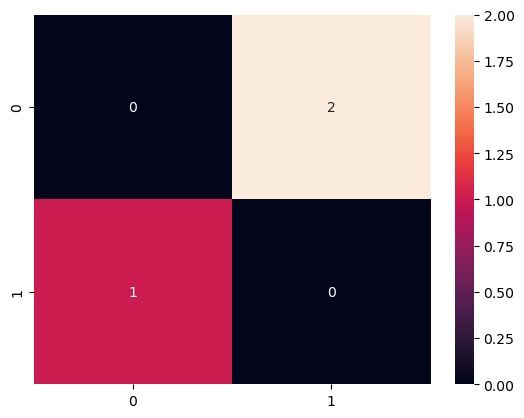

In [20]:
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

documents = [
    'Free money now!!!',
    'Call me maybe',
    'Win a million dollars',
    'Hey, how are you?',
    'Win big prizes!',
    'Important information about your account',
    'Free entry in a contest',
    'Can we meet tomorrow?',
    'You have won a lottery',
    'Just checking in'
]

# Labels: 1 for spam, 0 for not spam
labels = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(documents)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)




conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot = True)


new_documents = [
    'Congratulations, you won a free ticket!',
    'Can you call me back?',
    'Exclusive offer just for you',
    'Let\'s catch up soon',
    'You are selected for a prize'
]

X_new = vectorizer.transform(new_documents)

new_predictions = bnb.predict(X_new)

for doc, label in zip(new_documents, new_predictions):
    print(f'Text: "{doc}" -> Prediction: {"Spam" if label == 1 else "Not Spam"}')
